<a href="https://colab.research.google.com/github/YASHASM1502/Anomaly-Detection-in-a-Zero-Trust-IoT-Network/blob/main/Zero_Trust_IoT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Normal data
np.random.seed(42)
normal_data = {
    'packet_size': np.random.normal(500, 50, 1000),
    'duration': np.random.normal(60, 10, 1000),
    'src_port': np.random.randint(1000, 5000, 1000),
    'dst_port': np.random.randint(8000, 9000, 1000),
    'bytes_sent': np.random.normal(2000, 300, 1000),
    'bytes_received': np.random.normal(1800, 250, 1000)
}

In [3]:
# Anomaly data
anomaly_data = {
    'packet_size': np.random.normal(1000, 10, 50),
    'duration': np.random.normal(200, 20, 50),
    'src_port': np.random.randint(6000, 7000, 50),
    'dst_port': np.random.randint(9000, 10000, 50),
    'bytes_sent': np.random.normal(10000, 200, 50),
    'bytes_received': np.random.normal(9000, 150, 50)
}

In [4]:
# Create DataFrames
df_normal = pd.DataFrame(normal_data)
df_anomaly = pd.DataFrame(anomaly_data)
df = pd.concat([df_normal, df_anomaly], ignore_index=True)
df['label'] = [0]*1000 + [1]*50  # 0 = normal, 1 = anomaly

In [5]:
features = ['packet_size', 'duration', 'src_port', 'dst_port', 'bytes_sent', 'bytes_received']
model = IsolationForest(contamination=0.05, random_state=42)
df['pred'] = model.fit_predict(df[features])
df['pred'] = df['pred'].apply(lambda x: 1 if x == -1 else 0)

In [6]:
report = classification_report(df['label'], df['pred'], target_names=['Normal', 'Anomaly'])
conf_matrix = confusion_matrix(df['label'], df['pred'])
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      1000
     Anomaly       0.94      1.00      0.97        50

    accuracy                           1.00      1050
   macro avg       0.97      1.00      0.98      1050
weighted avg       1.00      1.00      1.00      1050

Confusion Matrix:
 [[997   3]
 [  0  50]]


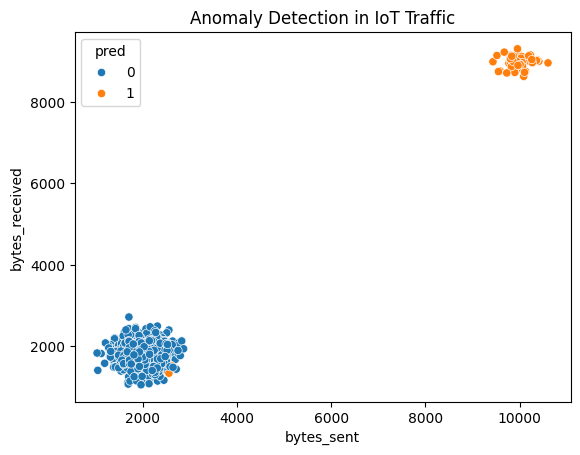

In [7]:
sns.scatterplot(x='bytes_sent', y='bytes_received', hue='pred', data=df)
plt.title("Anomaly Detection in IoT Traffic")
plt.show()